# FordGo Bikes - (Explanatory Analysis)
## by Victoria Michael

## Investigation Overview


> The goal of this ppresentation is to display the relationships betweenn user_type, genders and the weekly and daily FordGo bike usage. I used seaborn's countplot to check the hourly and weekly trip frequency. The categorical variables, user_type and member gender were also plotted using pandas plot function. I used different plot functions to differnetiate betwen plots.

## Dataset Overview

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Ford GoBike consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')



In [3]:

ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])

ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])


# Extract  Start Day, Month, Hour
ford_bike['start_day'] = ford_bike['start_time'].dt.day_name()

ford_bike['start_months'] = ford_bike['start_time'].dt.month_name()

ford_bike['start_hour'] = ford_bike['start_time'].dt.hour

# Extract  End Day, Month, Hour
ford_bike['End_day'] = ford_bike['end_time'].dt.day_name()

ford_bike['End_months'] = ford_bike['end_time'].dt.month_name()

ford_bike['End_hour'] = ford_bike['end_time'].dt.hour


In [4]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'End_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ford_bike[var] = ford_bike[var].astype(ordered_var)


## Busiest Day in the Week


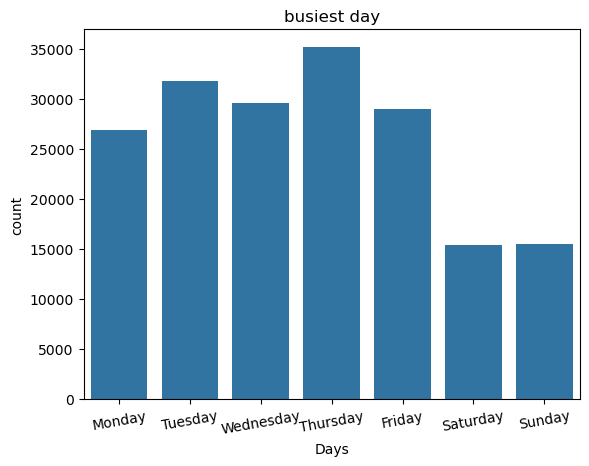

In [5]:
c = sb.color_palette()[0]

sb.countplot(data = ford_bike, x='start_day', color=c)
plt.xlabel("Days")
plt.xlim()
plt.xticks(rotation = 10)
plt.title("busiest day");

The busiest days were Thursday and Tuesday. On the weekends, Sunday was slightly higher than Saturday.


## Busiest Hours in a Day

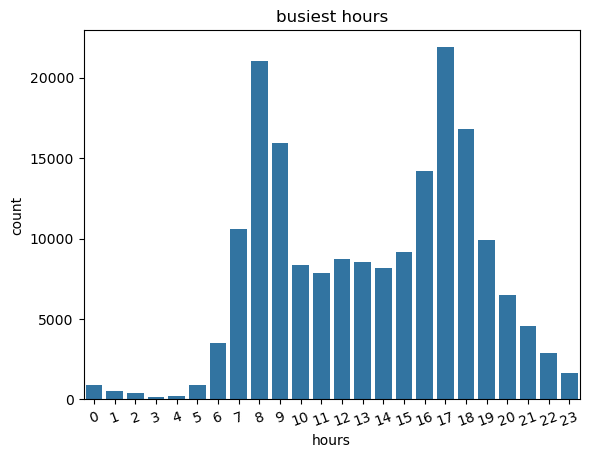

In [6]:
sb.countplot(data=ford_bike, x='start_hour', color=c);
plt.title("busiest hours")
plt.xlabel("hours")
plt.xticks(rotation=20);

The busiest Start hours were 8am and 17:00pm; which were evidently rush hours as people either went to work or returned by that time.

## Bike Share Ratio



Text(0.5, 0, 'Bike_share status')

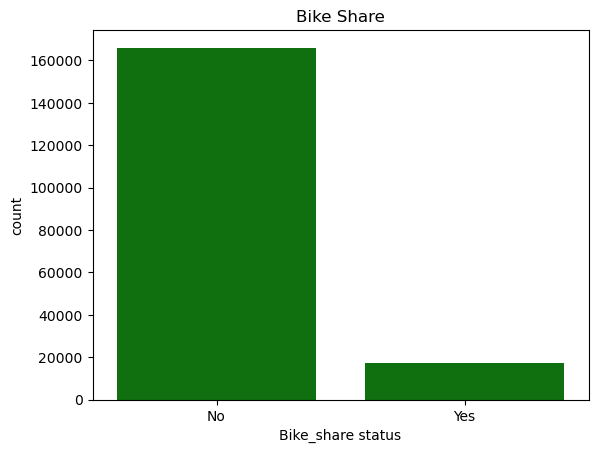

In [7]:
sb.countplot(data=ford_bike, x='bike_share_for_all_trip', color='green');
plt.title("Bike Share")
plt.xlabel("Bike_share status")
#plt.legend(loc = 1, framealpha = 1);

There were lesser Bike share in the dataset compared to the non-shared bike.

## User Type vs Gender



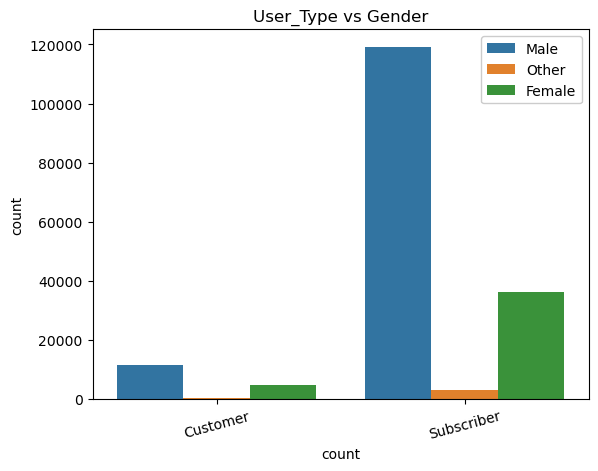

In [8]:
ax = sb.countplot(data=ford_bike, x='user_type', hue='member_gender' )
ax.legend(loc = 1, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)
plt.title("User_Type vs Gender")
plt.xlabel("count");

There were more Subscribers than Customers and the male users were higher than other genders

### Average Trip Duration

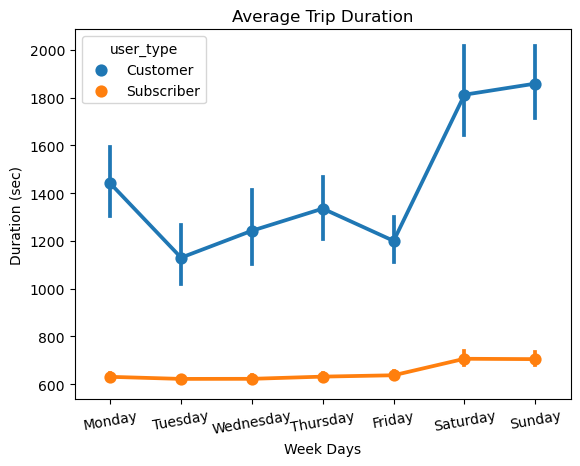

In [9]:
ax = sb.pointplot(data = ford_bike, x='start_day' , y='duration_sec', hue='user_type')
plt.xticks(rotation=10) #[0,1,2,3,4,5,6], ["Mon","Tues","Wed","Thurs","Fri","Sat","Sun"],
plt.xlabel('Week Days')
plt.ylabel('Duration (sec)')
plt.title('Average Trip Duration');

The weekend had the highest average trip duration by subscribers as compared to customers and other days of the week.

In [10]:
!jupyter nbconvert FordGo_part2.ipynb --to slides --post serve --no-input --no-prompt

^C
